### Getting Spotify Data From Kaggle

In [ ]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("StatsPlots")

    Updating registry at `C:\Users\User\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`


## Understanding the Data

In [32]:

using CSV
using DataFrames

In [42]:
# Load the CSV file into a DataFrame
df = CSV.read("spotify_songs.csv", DataFrame)
df

Row,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
,String31,String,String,Int64,String31,String,Date,String,String31,String7,String31,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754
2,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600
3,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-5,0.11,0.613,124.008,176616
4,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-6,0.204,0.277,121.956,169093
5,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0.0,0.0833,0.725,123.976,189052
6,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.127,0.0799,0.0,0.143,0.585,124.982,163049
7,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.187,0.0,0.176,0.152,112.648,187675
8,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,4.83e-6,0.111,0.367,127.936,207619
9,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-6,0.637,0.366,127.015,193187


## Preprocess Data

In [6]:
using Chain
@chain df begin
    dropmissing                      # Remove rows with missing values
    transform(:track_popularity => ByRow(x -> x >= 50) => :is_popular)  # Add binary 'is_popular'
    select(:liveness, :track_name,: track_artist, :danceability, :energy, :valence, :track_popularity, :is_popular)  # Select relevant columns
end

Row,danceability,energy,valence,track_popularity,is_popular
,Float64,Float64,Float64,Int64,Bool
1,0.748,0.916,0.518,66,true
2,0.726,0.815,0.693,67,true
3,0.675,0.931,0.613,70,true
4,0.718,0.93,0.277,60,true
5,0.65,0.833,0.725,69,true
6,0.675,0.919,0.585,67,true
7,0.449,0.856,0.152,62,true
8,0.542,0.903,0.367,69,true
9,0.594,0.935,0.366,68,true


In [35]:
@chain df begin
    select(:track_album_release_date)  # Select relevant columns
end

Row,track_album_release_date
,Date
1,2019-06-14
2,2019-12-13
3,2019-07-05
4,2019-07-19
5,2019-03-05
6,2019-07-11
7,2019-07-26
8,2019-08-29
9,2019-06-14


In [38]:
@chain df begin
    transform(:track_album_release_date => ByRow(year) => :year)  # Directly extract year
    select(:year)
end

Row,year
,Int64
1,2019
2,2019
3,2019
4,2019
5,2019
6,2019
7,2019
8,2019
9,2019


## Summary Stats

## Exploratory Data Analysis (Visualizing)

### Correlation MAtrix with Audio Features

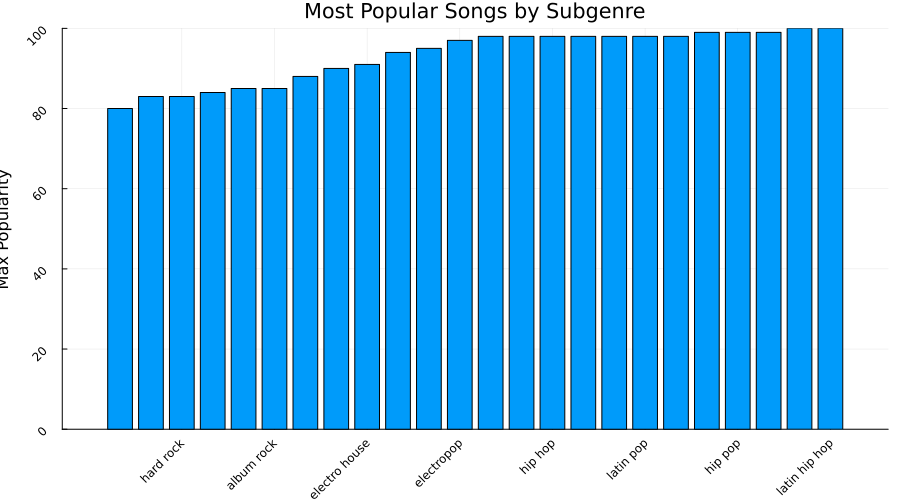

In [47]:
using Plots
most_popular_by_genre = @chain df begin
    groupby(:playlist_subgenre)  # Group by subgenre
    combine(:track_popularity => maximum => :max_popularity)  # Find max popularity for each group
    sort(:max_popularity, rev=false)  # Sort by popularity in descending order
end

x = most_popular_by_genre.playlist_subgenre  # Subgenre names
y = most_popular_by_genre.max_popularity  # Maximum popularity values


plot(x, y, seriestype = :bar, 
        xlabel = "Subgenre", ylabel = "Max Popularity", 
        title = "Most Popular Songs by Subgenre", 
        xticks=:auto, legend=false, rotation=45, size=(900, 500))


## 